In [1]:
#Task 1: Predictive Modeling (Regression)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
HP_df= pd.read_csv('Datasets/housePredictionDataSet.csv')
display(HP_df.head())

# name the columns
columns = [
    "CrimeRate", "ResidentialLandZone", "NonRetailLand", "NearRiver",
    "AirPollution", "AvgRooms", "OldBuildingsPct", "EmploymentDistance",
    "HighwayAccess", "PropertyTaxRate", "StudentTeacherRatio",
    "BlackPopulationIndex", "LowIncomePct", "MedianHomeValue"
]

HP_df = pd.read_csv("Datasets/housePredictionDataSet.csv", header=None, names=columns, sep='\s+')
display(HP_df.head())


<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hp\AppData\Local\Temp\ipykernel_152\3050214957.py:22: SyntaxWarning: invalid escape sequence '\s'
  HP_df = pd.read_csv("Datasets/housePredictionDataSet.csv", header=None, names=columns, sep='\s+')


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


,CrimeRate,ResidentialLandZone,NonRetailLand,NearRiver,AirPollution,AvgRooms,OldBuildingsPct,EmploymentDistance,HighwayAccess,PropertyTaxRate,StudentTeacherRatio,BlackPopulationIndex,LowIncomePct,MedianHomeValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# Train-test split
traindf, testdf = train_test_split(HP_df, test_size=0.2, random_state=42)

In [3]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(HP_df.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (506, 14)
Shape of training dataset is: (404, 14)
Shape of test dataset is: (102, 14)


In [4]:
y_train = traindf.MedianHomeValue
np.shape(y_train)

(404,)

In [5]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)
y_train_reshape.shape

(404, 1)

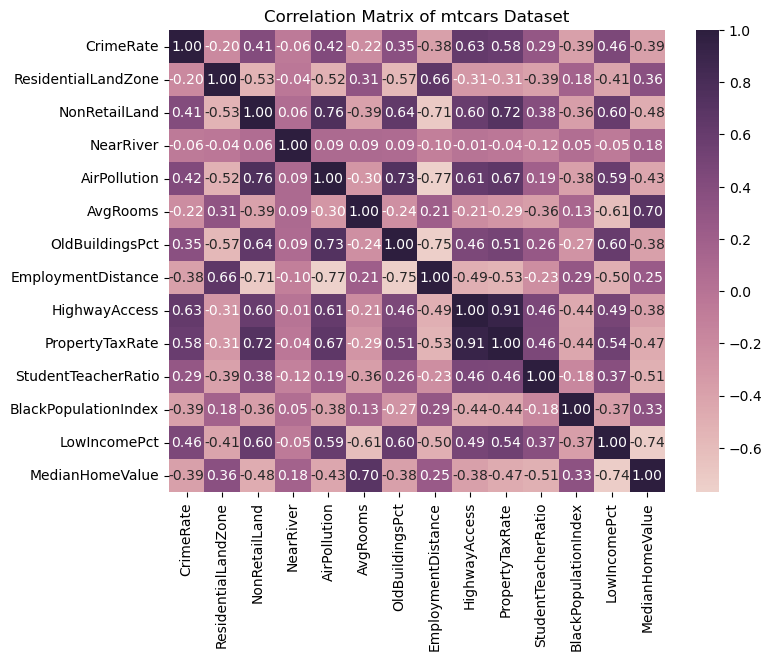

'for the result of the corelation matrix, we can see that the MedianHomeValue is highly correlated with the following features:\nLowIncomePct and AvgRooms '

In [6]:

# correlation matrix
numerical_columns = HP_df.select_dtypes(include=[np.number]).columns
corr = HP_df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Matrix of mtcars Dataset')
plt.show()

"""for the result of the corelation matrix, we can see that the MedianHomeValue is highly correlated with the following features:
LowIncomePct and AvgRooms """


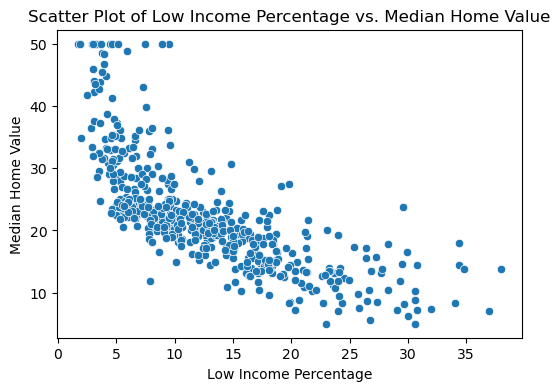

In [7]:

# Scatter plot for weight vs. mpg
plt.figure(figsize=(6, 4))
sns.scatterplot(x=HP_df['LowIncomePct'], y=HP_df['MedianHomeValue'])
plt.title('Scatter Plot of Low Income Percentage vs. Median Home Value')
plt.xlabel('Low Income Percentage')
plt.ylabel('Median Home Value')
plt.show()


*Answer for choosing the predictor:*

The strongest negative correlation is with LowIncomePct,
which suggests that as the percentage of low-income households increases,
the median home value tends to decrease. This makes sense intuitively,
as areas with higher low-income populations may have lower property values due to various socio-economic factors.

In [8]:
traindf, testdf = train_test_split(HP_df, test_size=0.2, random_state=42)
#compute y_train and x_train
y_train = traindf.MedianHomeValue
x_train = traindf[['LowIncomePct']]

In [9]:
#compute y_test and x_test
x_test = testdf[['LowIncomePct']]
y_test = testdf.MedianHomeValue
#create linear model
linear_model = LinearRegression()
#fit linear model
linear_model.fit(x_train, y_train)
#compute predicted_y
predicted_y = linear_model.predict(x_test)
#compute and r2 score on test data
r2_test = r2_score(y_test, predicted_y)
print("R^2 score on test data: ", r2_test)

R^2 score on test data:  0.5429180422970386


In [10]:
#r2 score on train data, mse on test data, mse on train data and final coefficients
r2_train = linear_model.score(x_train, y_train)
mse_test = mean_squared_error(y_test, predicted_y)
mse_train = mean_squared_error(y_train, linear_model.predict(x_train))
print("R^2 score on train data: ", r2_train)
print("MSE on test data: ", mse_test)
print("MSE on train data: ", mse_train)

R^2 score on train data:  0.5423180734793516
MSE on test data:  33.51954917268488
MSE on train data:  39.76038682967429


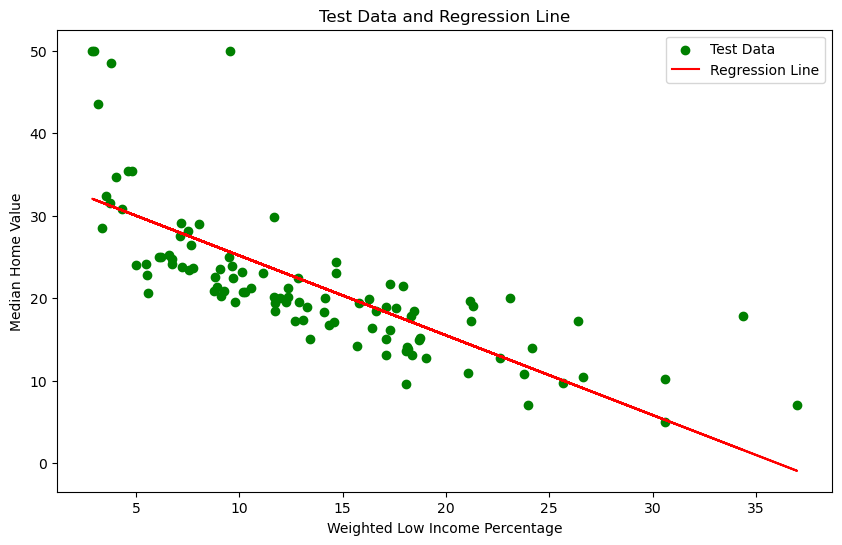

In [11]:
# TODO: plots
plt.figure(figsize=(10, 6))

plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_test, predicted_y, color='red', label='Regression Line')
plt.xlabel('Weighted Low Income Percentage')
plt.ylabel('Median Home Value')
plt.title('Test Data and Regression Line')
plt.legend()
plt.show()

In [12]:
HP_df.columns

Index(['CrimeRate', 'ResidentialLandZone', 'NonRetailLand', 'NearRiver',
       'AirPollution', 'AvgRooms', 'OldBuildingsPct', 'EmploymentDistance',
       'HighwayAccess', 'PropertyTaxRate', 'StudentTeacherRatio',
       'BlackPopulationIndex', 'LowIncomePct', 'MedianHomeValue'],
      dtype='object')

R^2 score on test data:  0.5739577415025858
R^2 score on train data:  0.6501592679428922
MSE on test data:  31.243290601783634
MSE on train data:  30.391855193214617


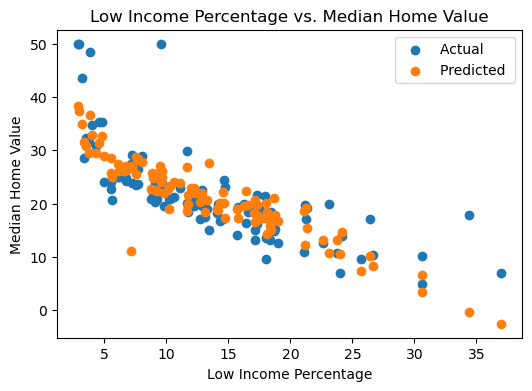

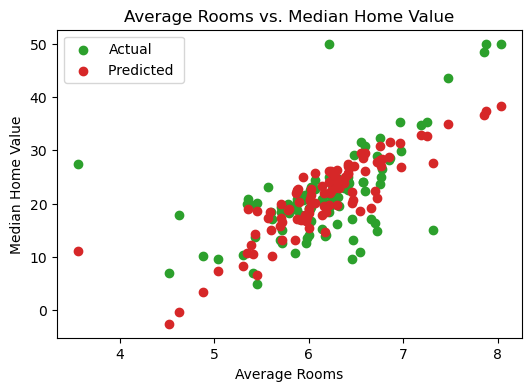

In [14]:
# Task 2: Multiple Linear Regression
traindf, testdf = train_test_split(HP_df, test_size=0.2, random_state=42)
features = ['LowIncomePct','AvgRooms']  # The features we want to use for prediction

y_train = traindf['MedianHomeValue']
x_train = traindf[features]
y_test = testdf['MedianHomeValue']
x_test = testdf[features]
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_y = linear_model.predict(x_test)
r2_test = r2_score(y_test, predicted_y)
r2_train = linear_model.score(x_train, y_train)
mse_test = mean_squared_error(y_test, predicted_y)
mse_train = mean_squared_error(y_train, linear_model.predict(x_train))
print("R^2 score on test data: ", r2_test)
print("R^2 score on train data: ", r2_train)
print("MSE on test data: ", mse_test)
print("MSE on train data: ", mse_train)

# plotting the results
# mgp vs. weight
plt.figure(figsize=(6, 4))
plt.scatter(x_test['LowIncomePct'], y_test, color='#1f77b4', label='Actual ')
plt.scatter(x_test['LowIncomePct'], predicted_y, color='#ff7f0e', label='Predicted ')
plt.title('Low Income Percentage vs. Median Home Value')
plt.xlabel('Low Income Percentage')
plt.ylabel('Median Home Value')
plt.legend()
plt.show()

# mgp vs. horsepower
plt.figure(figsize=(6, 4))
plt.scatter(x_test['AvgRooms'], y_test, color='#2ca02c', label='Actual')
plt.scatter(x_test['AvgRooms'], predicted_y, color='#d62728', label='Predicted ')
plt.title('Average Rooms vs. Median Home Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median Home Value')
plt.legend()
plt.show()